# Vamos montar uma estratégia de médias móveis para CSNA3: 

In [1]:
#Importamos os módulos necessários: 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb 
import numpy as np

# Definindo o ativo e a função para a estratégia:

In [11]:
#Definimos o tickers aonde queremos testar a estratégia:
ticker= 'CSNA3.SA'

#Criamos a função que dará a estratégia:  
# Se a média móvel de 10 dias for maior que a média móvel de 30 dias estaremos comprados, c.c vendidos:
def strategy(base): 
    if base['10 Days SMA']>base['30 Days SMA']: 
            return base['Next Day Return']
    else: 
            return -base['Next Day Return']

# Rodando a Estratégia:

In [12]:
# Importamos os dados de preço do ativo:
data_ticker = wb.DataReader(ticker,data_source='yahoo',start='2010-01-01')['Adj Close']

# Preenchemos os nans com o último valor preenchido: 
data_ticker.fillna(method='ffill',inplace=True)

# Criamos um dataframe aonde faremos o backtest:
data_backtest = data_ticker.to_frame()

# Retornos diários:
data_backtest['Daily Returns'] = data_backtest['Adj Close'].pct_change()

#Retornos do dia seguinte:
data_backtest['Next Day Return'] = data_backtest['Daily Returns'].shift(-1)

# Média móvel de 10 dias:
data_backtest['10 Days SMA'] = data_backtest['Adj Close'].rolling(window=10).mean()

# Média móvel de 30 dias:
data_backtest['30 Days SMA'] = data_backtest['Adj Close'].rolling(window=30).mean()

# Inserimos os retornos da estratégia:
data_backtest['Strategy Returns']= data_backtest[29:].apply(strategy,axis=1).shift(1)

#Inserimos a performance da estratégia:
data_backtest['Strategy Performance']= data_backtest['Strategy Returns'][29:].fillna(0).add(1).cumprod()

# Inserimos a performance do ativo:
data_backtest['Asset Performance'] = data_backtest['Adj Close'][29:]/data_backtest['Adj Close'][29]

# Plotamos os resultados da Estratégia:

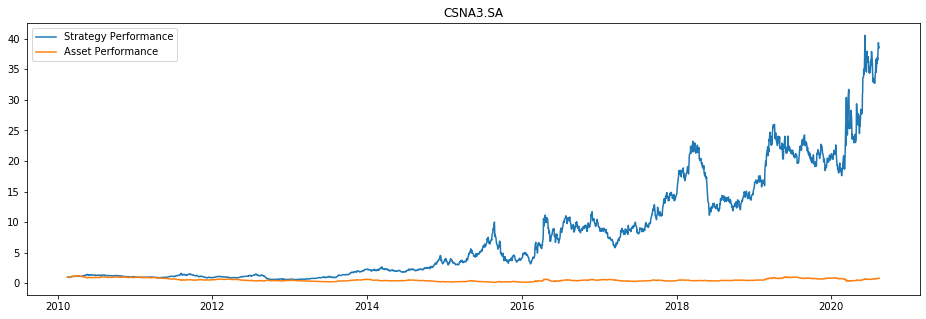

In [13]:
plt.figure(figsize=(16,5))
plt.plot(data_backtest['Strategy Performance'][29:],label="Strategy Performance")
plt.plot(data_backtest['Asset Performance'][29:],label='Asset Performance')
plt.title(ticker)
plt.legend()
plt.show()

# Plotando os resultados em log: 

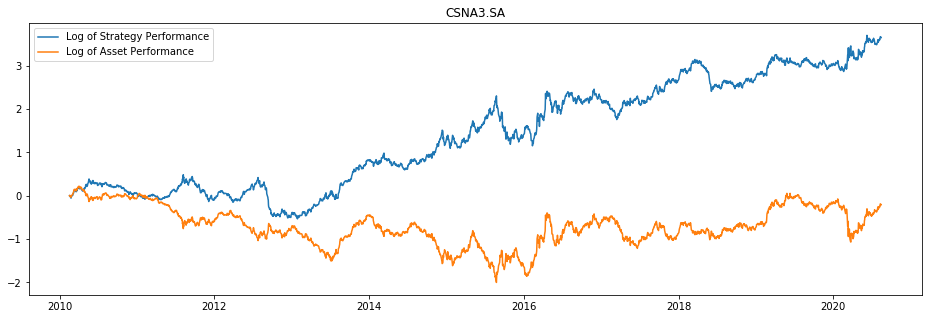

In [14]:
plt.figure(figsize=(16,5))
plt.plot(np.log(data_backtest['Strategy Performance'][29:]),label="Log of Strategy Performance")
plt.plot(np.log(data_backtest['Asset Performance'][29:]),label='Log of Asset Performance')
plt.title(ticker)
plt.legend()
plt.show()

# Fazendo um dataframe com os resultados:

In [15]:
#Montamos um dataframe com os resultados:
data_results = pd.DataFrame()
data_results['Strategy Returns']=data_backtest['Strategy Performance'].resample('Y',kind='period').last().pct_change()*100
data_results['Asset Returns']=data_backtest['Asset Performance'].resample('Y',kind='period').last().pct_change()*100
data_results.loc['Acumulado']=(data_backtest['Strategy Performance'][-1]/data_backtest['Strategy Performance'][29]-1)*100,\
                              (data_backtest['Asset Performance'][-1]/data_backtest['Asset Performance'][29]-1)*100
data_results = data_results.iloc[1:]
display(data_results)

,Strategy Returns,Asset Returns
Date,,
2011,-14.141572,-41.365756
2012,-31.162244,-15.286882
2013,261.509732,37.378644
2014,55.331996,-59.521028
2015,14.624379,-23.608320
2016,126.914376,171.250012
2017,54.437657,-22.764973
2018,5.266028,13.215109
2019,36.037819,78.846230
